In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Use a class to contain data

### Vectorize players' data
numpy의 array를 이용하여 X=n*m 행렬로 표현

In [153]:
# 예시 벡터
X=[[1,5,10,15],[4,8,12,16],[7,19,20,60],[2,6,5,1]]

In [154]:
X_std= (X-np.mean(X, axis=0))/ np.std(X, axis=0)

In [155]:
"from sklearn.preprocessing import StandardScaler \
X_std = StandardScaler().fit_transform(X)과 동일"
#Standardizing data
X_std 

array([[-1.09108945, -0.80498447, -0.32392137, -0.36085126],
       [ 0.21821789, -0.26832816,  0.04627448, -0.31574485],
       [ 1.52752523,  1.69941166,  1.52705788,  1.66893708],
       [-0.65465367, -0.62609903, -1.249411  , -0.99234096]])

In [156]:
mean_vec= np.mean(X_std, axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

In [157]:
cov_mat

array([[1.33333333, 1.2751761 , 1.17135868, 1.17460099],
       [1.2751761 , 1.33333333, 1.20856331, 1.27757258],
       [1.17135868, 1.20856331, 1.33333333, 1.29689391],
       [1.17460099, 1.27757258, 1.29689391, 1.33333333]])

### Find eigenvector

In [158]:
#Eigendecomposition of covariance matrix
cov_mat=np.cov(X_std.T)
eig_vals, eig_vectors = np.linalg.eig(cov_mat)

In [159]:
eig_vals

array([ 5.03606949e+00,  2.19763511e-01,  7.75003376e-02, -8.24547807e-17])

In [160]:
eig_vectors

array([[ 0.49172592,  0.67560164,  0.44477785,  0.32239836],
       [ 0.50588574,  0.28661499, -0.58416983, -0.56628356],
       [ 0.49747723, -0.53648776,  0.55342345, -0.39801982],
       [ 0.5047788 , -0.41664752, -0.39324389,  0.6457263 ]])

In [161]:
#Sort the eigenvalues descending
idx= np.argsort(eig_vals)[::-1]

In [162]:
eig_vals=eig_vals[idx]
eig_vectors=eig_vectors[:,idx]

In [163]:
eig_vals

array([ 5.03606949e+00,  2.19763511e-01,  7.75003376e-02, -8.24547807e-17])

### PCA projection to k-dimension

In [147]:
# k차원으로 pca = np.dot(X, w[:,:k])
a3= np.dot(X_std, eig_vectors[:,:3])
a2= np.dot(X_std, eig_vectors[:,:2])
a1= np.dot(X_std, eig_vectors[:,:1])

In [148]:
a1

array([[-1.28704071],
       [-0.1648008 ],
       [ 3.21295247],
       [-1.76111096]])

In [149]:
a2

array([[-1.28704071e+00,  2.77555756e-17],
       [-1.64800801e-01,  8.81239526e-16],
       [ 3.21295247e+00, -6.93889390e-17],
       [-1.76111096e+00, -9.99200722e-16]])

In [150]:
a3

array([[-1.28704071e+00,  2.77555756e-17, -5.24079064e-02],
       [-1.64800801e-01,  8.81239526e-16,  4.03581815e-01],
       [ 3.21295247e+00, -6.93889390e-17, -1.24525296e-01],
       [-1.76111096e+00, -9.99200722e-16, -2.26648612e-01]])

### Visualization

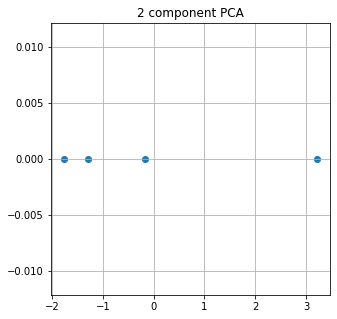

In [151]:
fig=plt.figure(figsize=(5,5))
axis = fig.add_subplot(111)
axis.set_title('2 component PCA')
axis.grid(True)

plt.scatter(a2[:,0], a2[:, 1])
plt.show()